### Donwloading Dataset

In [ ]:
!pip install kaggle
!mkdir .kaggle

In [ ]:
import json
token = {"username":"ystark","key":"7d9d124dcd4afabb3ef553b00daea011"}
with open('/content/.kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
#May require to run twice
!cp /content/.kaggle/kaggle.json ~/.kaggle/kaggle.json;
!kaggle config set -n path -v {/content};
!chmod 600 /root/.kaggle/kaggle.json;
!kaggle competitions download -c twitter-sentiment-analysis2;

!unzip /content/{/content}/competitions/twitter-sentiment-analysis2/train.csv.zip;
!unzip /content/{/content}/competitions/twitter-sentiment-analysis2/test.csv.zip;

- path is now set to: {/content}
  0% 0.00/3.67M [00:00<?, ?B/s]
100% 3.67M/3.67M [00:00<00:00, 60.7MB/s]
 82% 9.00M/11.0M [00:00<00:00, 26.7MB/s]
100% 11.0M/11.0M [00:00<00:00, 27.6MB/s]
Archive:  /content/{/content}/competitions/twitter-sentiment-analysis2/train.csv.zip
  inflating: train.csv               
Archive:  /content/{/content}/competitions/twitter-sentiment-analysis2/test.csv.zip
  inflating: test.csv                


# Begin Project

file descriptions

train.csv - the training set
test.csv - the test set
Data fields

ItemID - id of twit
Sentiment - sentiment
SentimentText - text of the twit


0 - negative

1 - positive

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import string 
import re
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
train_data=pd.read_csv('/content/train.csv',encoding = "ISO-8859-1")
train_data.head()

,ItemID,Sentiment,SentimentText
0,1,0,is so sad for my APL frie...
1,2,0,I missed the New Moon trail...
2,3,1,omg its already 7:30 :O
3,4,0,.. Omgaga. Im sooo im gunna CRy. I'...
4,5,0,i think mi bf is cheating on me!!! ...




```
# This is formatted as code
```

### Exploratory Data Analysis

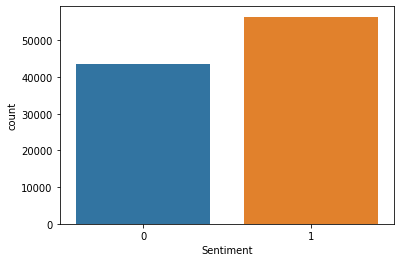

In [ ]:
sns.countplot(x = 'Sentiment', data = train_data)

### Preprocessing

In [ ]:
tweets=pd.DataFrame(train_data.SentimentText)

In [ ]:
tt = TweetTokenizer()
tweets['tokenized_text']=tweets.apply(lambda row: tt.tokenize(row['SentimentText']),axis=1)
tweets.head(10)

,SentimentText,tokenized_text
0,is so sad for my APL frie...,"[is, so, sad, for, my, APL, friend, ...]"
1,I missed the New Moon trail...,"[I, missed, the, New, Moon, trailer, ...]"
2,omg its already 7:30 :O,"[omg, its, already, 7:30, :, O]"
3,.. Omgaga. Im sooo im gunna CRy. I'...,"[.., Omgaga, ., Im, sooo, im, gunna, CRy, ., I..."
4,i think mi bf is cheating on me!!! ...,"[i, think, mi, bf, is, cheating, on, me, !, !,..."
5,or i just worry too much?,"[or, i, just, worry, too, much, ?]"
6,Juuuuuuuuuuuuuuuuussssst Chillin!!,"[Juuuuuuuuuuuuuuuuussssst, Chillin, !, !]"
7,Sunny Again Work Tomorrow :-| ...,"[Sunny, Again, Work, Tomorrow, :-|, TV, Tonight]"
8,handed in my uniform today . i miss you ...,"[handed, in, my, uniform, today, ., i, miss, y..."
9,hmmmm.... i wonder how she my number @-),"[hmmmm, ..., i, wonder, how, she, my, number, ..."


In [ ]:
total_words=0
for i in range(len(tweets)):
  total_words+=len(tweets.tokenized_text[i])

average_document_length=total_words/len(tweets)
print("average_document_length: ",average_document_length)

average_document_length:  15.611687285601416


In [ ]:
#Final Preprocessing
from nltk.stem import WordNetLemmatizer
import re

stemmer = WordNetLemmatizer()
stopword = nltk.corpus.stopwords.words('english')


def document_cleaner(document):
    # Remove \n
    document = re.sub('\s+[\\n\\r]+', '', document)

    # Remove all the special characters
    document = re.sub('\W', ' ', document)

    # Remove all single characters
    document = re.sub('\s+[a-zA-Z]\s+', ' ', document)

    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document)

    document = document.lower()

    # Lemmatization
    document = document.split()
    #ebgala hdh ta stopwords
    document = [word for word in document if word not in stopword]

    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    return document

In [ ]:
tweets['preprocessed_tokenized_text']=tweets['SentimentText'].apply(document_cleaner)
tweets['preprocessed_tokenized_text']=tweets.apply(lambda row: tt.tokenize(row['preprocessed_tokenized_text']),axis=1)
tweets['joined_prepr_text'] = tweets['preprocessed_tokenized_text'].apply(lambda x: ' '.join(map(str, x)))
tweets.head(10)

,SentimentText,tokenized_text,preprocessed_tokenized_text,joined_prepr_text
0,is so sad for my APL frie...,"[is, so, sad, for, my, APL, friend, ...]","[sad, apl, friend]",sad apl friend
1,I missed the New Moon trail...,"[I, missed, the, New, Moon, trailer, ...]","[missed, new, moon, trailer]",missed new moon trailer
2,omg its already 7:30 :O,"[omg, its, already, 7:30, :, O]","[omg, already, 7, 30]",omg already 7 30
3,.. Omgaga. Im sooo im gunna CRy. I'...,"[.., Omgaga, ., Im, sooo, im, gunna, CRy, ., I...","[omgaga, im, sooo, im, gunna, cry, dentist, si...",omgaga im sooo im gunna cry dentist since 11 s...
4,i think mi bf is cheating on me!!! ...,"[i, think, mi, bf, is, cheating, on, me, !, !,...","[think, mi, bf, cheating, t_t]",think mi bf cheating t_t
5,or i just worry too much?,"[or, i, just, worry, too, much, ?]","[worry, much]",worry much
6,Juuuuuuuuuuuuuuuuussssst Chillin!!,"[Juuuuuuuuuuuuuuuuussssst, Chillin, !, !]","[juuuuuuuuuuuuuuuuussssst, chillin]",juuuuuuuuuuuuuuuuussssst chillin
7,Sunny Again Work Tomorrow :-| ...,"[Sunny, Again, Work, Tomorrow, :-|, TV, Tonight]","[sunny, work, tomorrow, tv, tonight]",sunny work tomorrow tv tonight
8,handed in my uniform today . i miss you ...,"[handed, in, my, uniform, today, ., i, miss, y...","[handed, uniform, today, miss, already]",handed uniform today miss already
9,hmmmm.... i wonder how she my number @-),"[hmmmm, ..., i, wonder, how, she, my, number, ...","[hmmmm, wonder, number]",hmmmm wonder number


In [ ]:
vocab_size=0
for i in range(len(tweets)):
  vocab_size+=len(tweets.preprocessed_tokenized_text 	[i])

print('Vocab_size: ',vocab_size)

Vocab_size:  794316


### Create Train-Test Set

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(tweets['joined_prepr_text'],train_data['Sentiment'],test_size = 0.3,random_state=1)

In [ ]:
print(X_train.shape, X_test.shape)

(69992,) (29997,)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(ngram_range=(1,2),max_features = 5000)
X_train_tfidf=tfidf.fit_transform(X_train)
X_test_tfidf=tfidf.transform(X_test)

### Hyper parameter tuning for Logistic Regression

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

In [ ]:
lr_pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('lr', LogisticRegression())])

grid_params = {
  'lr__solver': ['liblinear'],
  'lr__C': np.linspace(0.1, 1, 10),
  'lr__max_iter': [50, 100, 200],
  'lr__penalty': ['l1', 'l2', 'elasticnet'],
  'tfidf_vectorizer__max_features': [1000, 2000, 5000,10000],
  'tfidf_vectorizer__max_df': np.linspace(0.1, 1, 10),
  'tfidf_vectorizer__binary': [True, False],
  'tfidf_vectorizer__norm': [None, 'l1', 'l2'], 
}

clf = RandomizedSearchCV(lr_pipeline, grid_params,scoring='f1',cv=5,n_jobs=-1, n_iter=100)
clf.fit(X_train, y_train)
print("Best Score: ", clf.best_score_)
print("Best Params: ", clf.best_params_)

Best Score:  0.7851259595495291
Best Params:  {'tfidf_vectorizer__norm': 'l2', 'tfidf_vectorizer__max_features': 10000, 'tfidf_vectorizer__max_df': 0.2, 'tfidf_vectorizer__binary': False, 'lr__solver': 'liblinear', 'lr__penalty': 'l2', 'lr__max_iter': 200, 'lr__C': 0.4}


###Naive Bayes tuning

In [ ]:
mnb_pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('mnb', MultinomialNB())
])

grid_params={
  'mnb__alpha': np.linspace(0.5, 1.5, 6),
  'mnb__fit_prior': [True, False],
  'tfidf_vectorizer__max_features': [1000, 2000, 5000,10000],
  'tfidf_vectorizer__max_df': np.linspace(0.1, 1, 10),
  'tfidf_vectorizer__binary': [True, False],
  'tfidf_vectorizer__norm': [None, 'l1', 'l2'],   
}

mnb_tuned = RandomizedSearchCV(mnb_pipeline, grid_params,scoring='f1',cv=5,n_jobs=-1,n_iter=100)
mnb_tuned.fit(X_train, y_train)
print("Best Score: ", mnb_tuned.best_score_)
print("Best Params: ", mnb_tuned.best_params_)

Best Score:  0.7836748266636855
Best Params:  {'tfidf_vectorizer__norm': 'l2', 'tfidf_vectorizer__max_features': 10000, 'tfidf_vectorizer__max_df': 1.0, 'tfidf_vectorizer__binary': False, 'mnb__fit_prior': True, 'mnb__alpha': 1.1}


In [ ]:
import pickle

with open('mnb.pickle', 'wb') as handle:
    pickle.dump(mnb_tuned.best_params_, handle, protocol=pickle.HIGHEST_PROTOCOL)

### Results

#### Dummy Classifier


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

results = {}

base = DummyClassifier(strategy='most_frequent')
base.fit(X_train_tfidf, y_train)

predictions = base.predict(X_train_tfidf)
results['f1-score train'] = f1_score(y_train, predictions)
results['f1-score macro train'] = f1_score(y_train, predictions, average='macro')
results['precision train'] = precision_score(y_train, predictions)
results['recall train'] = recall_score(y_train, predictions)
print("train f1-score: %.2f%%" % (results['f1-score train']*100))
print("train macro f1-score: %.2f%%" % (results['f1-score macro train']*100))
print("train precision: %.2f%%" % (results['precision train']*100))
print("train recall: %.2f%%" % (results['recall train']*100))

predictions_test = base.predict(X_test_tfidf)
results['f1-score test'] = f1_score(y_test, predictions_test)
results['f1-score macro test'] = f1_score(y_test, predictions_test, average='macro')
results['precision test'] = precision_score(y_test, predictions_test)
results['recall test'] = recall_score(y_test, predictions_test)
print("test f1-score: %.2f%%" % (results['f1-score test']*100))
print("test macro f1-score: %.2f%%" % (results['f1-score macro test']*100))
print("test precision: %.2f%%" % (results['precision test']*100))
print("test recall: %.2f%%" % (results['recall test']*100))
print()
print("test data confusion matrix")
y_true = pd.Series(y_test, name='True')
y_pred = pd.Series(predictions_test, name='Predicted')
pd.crosstab(y_true, y_pred)

train f1-score: 72.18%
train macro f1-score: 36.09%
train precision: 56.47%
train recall: 100.00%
test f1-score: 72.16%
test macro f1-score: 36.08%
test precision: 56.45%
test recall: 100.00%

test data confusion matrix


Predicted,1
True,
0,4564
1,4604


#### Logistic regression


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver="liblinear", penalty='l1', max_iter= 100, C= 0.9)

#instantiate X_train feature vector according to the best tf-idf parameters fitted for LG
tfidf_LR=TfidfVectorizer(ngram_range=(1,2),max_features = 10000,binary=False,norm='l2',max_df=0.3)
X_train_tfidf_LR=tfidf_LR.fit_transform(X_train)
X_test_tfidf_LR=tfidf_LR.transform(X_test)

lr.fit(X_train_tfidf_LR, y_train)
results = {}

predictions = lr.predict(X_train_tfidf_LR)
results['f1-score train'] = f1_score(y_train, predictions)
results['f1-score macro train'] = f1_score(y_train, predictions, average='macro')
results['precision train'] = precision_score(y_train, predictions)
results['recall train'] = recall_score(y_train, predictions)
print("train f1-score: %.2f%%" % (results['f1-score train']*100))
print("train macro f1-score: %.2f%%" % (results['f1-score macro train']*100))
print("train precision: %.2f%%" % (results['precision train']*100))
print("train recall: %.2f%%" % (results['recall train']*100))

predictions_test = lr.predict(X_test_tfidf_LR)
results['f1-score test'] = f1_score(y_test, predictions_test)
results['f1-score macro test'] = f1_score(y_test, predictions_test, average='macro')
results['precision test'] = precision_score(y_test, predictions_test)
results['recall test'] = recall_score(y_test, predictions_test)
print("test f1-score: %.2f%%" % (results['f1-score test']*100))
print("test macro f1-score: %.2f%%" % (results['f1-score macro test']*100))
print("test precision: %.2f%%" % (results['precision test']*100))
print("test recall: %.2f%%" % (results['recall test']*100))
print()
print("test data confusion matrix")
y_true = pd.Series(y_test, name='True')
y_pred = pd.Series(predictions_test, name='Predicted')
pd.crosstab(y_true, y_pred)

train f1-score: 81.34%
train macro f1-score: 76.92%
train precision: 77.31%
train recall: 85.81%
test f1-score: 79.07%
test macro f1-score: 74.05%
test precision: 75.01%
test recall: 83.60%

test data confusion matrix


Predicted,0,1
True,,
0,1718,2846
1,1704,2900


#### Multinomial NB 

In [ ]:
NB = MultinomialNB(alpha=1.1,fit_prior=True)

#instantiate X_train feature vector according to the best tf-idf parameters fitted for NB
tfidf_NB=TfidfVectorizer(ngram_range=(1,2),max_features = 10000,binary=False,norm='l2',max_df=1.0)
X_train_tfidf_NB=tfidf_NB.fit_transform(X_train)
X_test_tfidf_NB=tfidf_NB.transform(X_test)

NB.fit(X_train_tfidf_NB, y_train)
results = {}

predictions = NB.predict(X_train_tfidf_NB)
results['f1-score train'] = f1_score(y_train, predictions)
results['f1-score macro train'] = f1_score(y_train, predictions, average='macro')
results['precision train'] = precision_score(y_train, predictions)
results['recall train'] = recall_score(y_train, predictions)
print("train f1-score: %.2f%%" % (results['f1-score train']*100))
print("train macro f1-score: %.2f%%" % (results['f1-score macro train']*100))
print("train precision: %.2f%%" % (results['precision train']*100))
print("train recall: %.2f%%" % (results['recall train']*100))

predictions_test = NB.predict(X_test_tfidf_NB)
results['f1-score test'] = f1_score(y_test, predictions_test)
results['f1-score macro test'] = f1_score(y_test, predictions_test, average='macro')
results['precision test'] = precision_score(y_test, predictions_test)
results['recall test'] = recall_score(y_test, predictions_test)
print("test f1-score: %.2f%%" % (results['f1-score test']*100))
print("test macro f1-score: %.2f%%" % (results['f1-score macro test']*100))
print("test precision: %.2f%%" % (results['precision test']*100))
print("test recall: %.2f%%" % (results['recall test']*100))
print()
print("test data confusion matrix")
y_true = pd.Series(y_test, name='True')
y_pred = pd.Series(predictions_test, name='Predicted')
pd.crosstab(y_true, y_pred)

train f1-score: 81.84%
train macro f1-score: 77.64%
train precision: 78.00%
train recall: 86.06%
test f1-score: 78.41%
test macro f1-score: 73.25%
test precision: 74.43%
test recall: 82.84%

test data confusion matrix


Predicted,0,1
True,,
0,1732,2832
1,1678,2926


### Learning Curves 

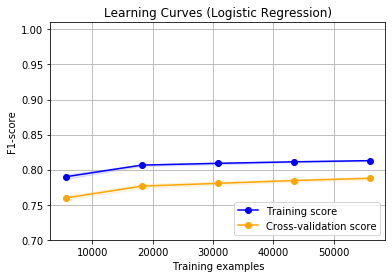

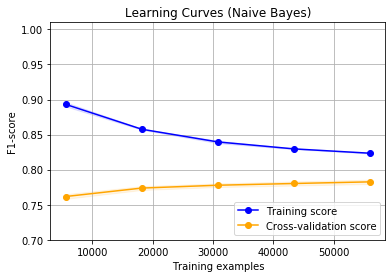

In [ ]:
#Learning curves with cross-validtion
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("F1-score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs,scoring='f1', train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="b")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="orange")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="b",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="orange",
             label="Cross-validation score")

    plt.legend(loc="lower right")
    return plt


X, y = X_train_tfidf_LR,y_train


title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
plot_learning_curve(lr, title, X_train_tfidf_LR, y, (0.7, 1.01), cv=cv, n_jobs=-1)
plt.show()


title = "Learning Curves (Naive Bayes)"
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
# estimator = MultinomialNB()
plot_learning_curve(NB, title, X_train_tfidf_NB, y, ylim=(0.7, 1.01), cv=cv, n_jobs=2)
plt.show()

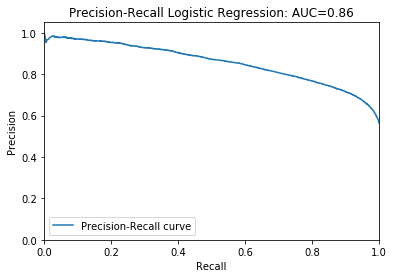

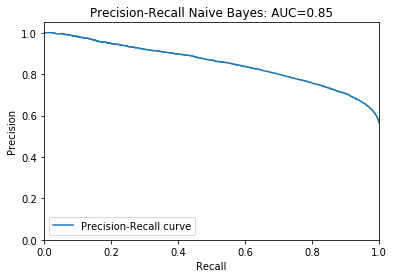

In [ ]:
#Precision-Recall curves
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


#disable warnings for large float numbers of estimated probabilities
np.seterr(all='ignore')
estimators = {'Logistic Regression':lr,
              'Naive Bayes':NB}

for (name,estimator) in estimators.items():
    
    model =estimator
    if(name=='Logistic Regression'):
      pred = model.predict_proba(X_test_tfidf_LR)
    elif(name=='Naive Bayes'):
      pred = model.predict_proba(X_test_tfidf_NB)
      
    precision, recall, thresholds = precision_recall_curve(y_test, pred[:,1])
    area = auc(recall, precision)

    plt.plot(recall, precision, label='Precision-Recall curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall %s: AUC=%0.2f' % (name,area))
    plt.legend(loc="lower left")
    plt.show()

### Bootstrap

In [ ]:
from tqdm import tqdm
from sklearn.utils import resample

def bootstrap_test(n_iterations, n_size, X, y, model1, model2):
  #this function was based on slide 31
  #get predictions on the whole test set for the two models
  initial_predictions_model1 = model1.predict(X)
  initial_predictions_model2 = model2.predict(X)
  initial_model1_f1score = f1_score(y, initial_predictions_model1, average='macro')
  initial_model2_f1score = f1_score(y, initial_predictions_model2, average='macro')
  #estimate δ(x) for whole test set
  initial_dif = initial_model1_f1score - initial_model2_f1score
  #setup b
  bsets = 0
  my_list=list(range(n_iterations))
  for i in tqdm(my_list):
    #sample with replacement the test set
    X_sub, y_sub = resample(X, y, n_samples=n_size)
    #get predictions on the new sub-set for the two models
    subsample_predictions_model1 = model1.predict(X_sub)
    subsample_predictions_model2 = model2.predict(X_sub)
    subsample_model1_f1score = f1_score(y_sub, subsample_predictions_model1, average='macro')
    subsample_model2_f1score = f1_score(y_sub, subsample_predictions_model2, average='macro')
    #estimate δ(x*(i)) for new sub-set test set
    subsample_dif = subsample_model1_f1score - subsample_model2_f1score
    if subsample_dif > 2 * initial_dif:
      bsets +=1
    p_value = bsets / n_iterations
  return p_value

In [ ]:
# configure bootstrap
n_iterations = 10000
n_size = len(y_test)

In [ ]:
# run bootstrap between LR and dummy classifier
bootstrap_test(n_iterations, n_size, X_test_tfidf_LR, y_test, lr, base)

100%|██████████| 10000/10000 [05:04<00:00, 31.43it/s]


0.0

In [ ]:
# run bootstrap between LR and Naive Bayes
bootstrap_test(n_iterations, n_size, X_test_tfidf_LR, y_test, lr, NB)

100%|██████████| 10000/10000 [05:41<00:00, 29.24it/s]


0.0001